## 필요한 모듈 불러오기

In [365]:
import pandas as pd
import numpy as np

#VitalDB
import vitaldb

#시각화 도구
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [289]:
df_cases = pd.read_csv("https://api.vitaldb.net/cases")  # 임상 정보
df_trks = pd.read_csv('https://api.vitaldb.net/trks')  # 트랙 목록
df_labs = pd.read_csv('https://api.vitaldb.net/labs')  # 검사 결과
#df_cases[:10]

In [290]:
df_cases

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15720,-1020,14940,1740,14640,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4440,-540,4260,-540,3960,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,21000,-720,20280,2580,18180,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21540,-960,22440,2640,21840,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6384,5583,0,15240,-240,15660,-240,15060,-215340,648660,...,0,150,0.0,0,90,0,20,0,0,0
6384,6385,2278,0,20640,-540,21000,-540,19800,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19440,-660,19140,3540,18540,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12000,-540,12840,1740,12240,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


In [291]:
df_cases.columns

Index(['caseid', 'subjectid', 'casestart', 'caseend', 'anestart', 'aneend',
       'opstart', 'opend', 'adm', 'dis', 'icu_days', 'death_inhosp', 'age',
       'sex', 'height', 'weight', 'bmi', 'asa', 'emop', 'department', 'optype',
       'dx', 'opname', 'approach', 'position', 'ane_type', 'preop_htn',
       'preop_dm', 'preop_ecg', 'preop_pft', 'preop_hb', 'preop_plt',
       'preop_pt', 'preop_aptt', 'preop_na', 'preop_k', 'preop_gluc',
       'preop_alb', 'preop_ast', 'preop_alt', 'preop_bun', 'preop_cr',
       'preop_ph', 'preop_hco3', 'preop_be', 'preop_pao2', 'preop_paco2',
       'preop_sao2', 'cormack', 'airway', 'tubesize', 'dltubesize', 'lmasize',
       'iv1', 'iv2', 'aline1', 'aline2', 'cline1', 'cline2', 'intraop_ebl',
       'intraop_uo', 'intraop_rbc', 'intraop_ffp', 'intraop_crystalloid',
       'intraop_colloid', 'intraop_ppf', 'intraop_mdz', 'intraop_ftn',
       'intraop_rocu', 'intraop_vecu', 'intraop_eph', 'intraop_phe',
       'intraop_epi', 'intraop_ca'],
     

In [292]:
df_cases['department'].unique() 
#일반외과 #흉부외과, 비뇨기과, 산부인과

array(['General surgery', 'Thoracic surgery', 'Urology', 'Gynecology'],
      dtype=object)

In [293]:
df_cases['ane_type'].unique() 
# General : 일반, Spinal : 척추, Sedationalgesia : 진정,진통 

array(['General', 'Spinal', 'Sedationalgesia'], dtype=object)

In [302]:
df_cases['optype'].unique() 

array(['Colorectal', 'Stomach', 'Biliary/Pancreas', 'Vascular',
       'Major resection', 'Breast', 'Minor resection', 'Transplantation',
       'Hepatic', 'Thyroid', 'Others'], dtype=object)

In [303]:
df_cases['ane_type'] = df_cases['ane_type'].map({'General' : 0, 'Spinal': 1, 'Sedationalgesia':2})
df_cases['department'] = df_cases['department'].map({'General surgery' : 0, 'Thoracic surgery' : 1, 'Urology' : 2, 'Gynecology' : 3})
df_cases['optype'] = df_cases['optype'].map({'Colorectal' : 0, 'Stomach' : 1, 'Biliary/Pancreas' : 2, 'Vascular' : 3,
       'Major resection' : 4, 'Breast': 5, 'Minor resection' : 6 , 'Transplantation' : 7,
       'Hepatic' : 8, 'Thyroid':9, 'Others' : 10})

## 1. Vital Signal로 암(or 돌)을 예측할 수 있을까?

In [304]:
df_cases['dx']

0                                    Rectal cancer
1                         Advanced gastric cancer 
2                                Gallbladder stone
3                          Advanced gastric cancer
4                                 Aortic aneurysm 
                           ...                    
6383                       Advanced gastric cancer
6384      Colon submucosal tumor, unknown behavior
6385                         Early gastric cancer 
6386    Common bile duct stone without obstruction
6387       Epithelial ovarian cancer unknown stage
Name: dx, Length: 6388, dtype: object

In [363]:
search_keyword = 'cancer'
keywords_list = list(filter(lambda name: search_keyword in name, df_cases['dx'] ))
count_keywords = len(keywords_list)
count_keywords

2443

In [364]:
search_keyword = 'stone'
keywords_list = list(filter(lambda name: search_keyword in name, df_cases['dx'] ))
count_keywords = len(keywords_list)
count_keywords

313

## 2. Vital Sign으로 암의 종류를 분류할 수 있을까?

In [350]:
#cnt = 0
#[cnt for i in df_cases['dx'] if 'cancer' in i]
df_cases['dx'].to_list().count('Rectal cancer')

169

## 3. Early gastric cancer 에 관련한 연구 (n=252)

In [314]:
df_cases['dx'].describe()

count                     6388
unique                    1038
top       Early gastric cancer
freq                       252
Name: dx, dtype: object

In [310]:
df_cases['approach'].unique()

array(['Open', 'Videoscopic', 'Robotic'], dtype=object)

In [313]:
df_cases['approach'].describe()

count     6388
unique       3
top       Open
freq      3365
Name: approach, dtype: object

In [308]:
df_cases['position'].unique()
#Supine 누워 있기
#Lithotomy 누워서 테이블 자세
#Prone 엎드리기

array(['Lithotomy', 'Supine', 'Reverse Trendelenburg', 'Prone',
       'Left lateral decubitus', 'Right lateral decubitus', nan,
       'Trendelenburg', 'Sitting', 'Left kidney', 'Right kidney'],
      dtype=object)

In [369]:
le = LabelEncoder()
df_cases['position'].fillna('None',inplace=True)
df_cases['position'] = le.fit_transform(df_cases['position'])

In [370]:
df_cases['position']

0       2
1       9
2       5
3       5
4       4
       ..
6383    9
6384    2
6385    9
6386    9
6387    2
Name: position, Length: 6388, dtype: int32

In [373]:
df_cases['opduration'] = df_cases['opend'] - df_cases['opstart']

## 자세 수술 타입, 연령, 성별, 사망환자, 수술시간

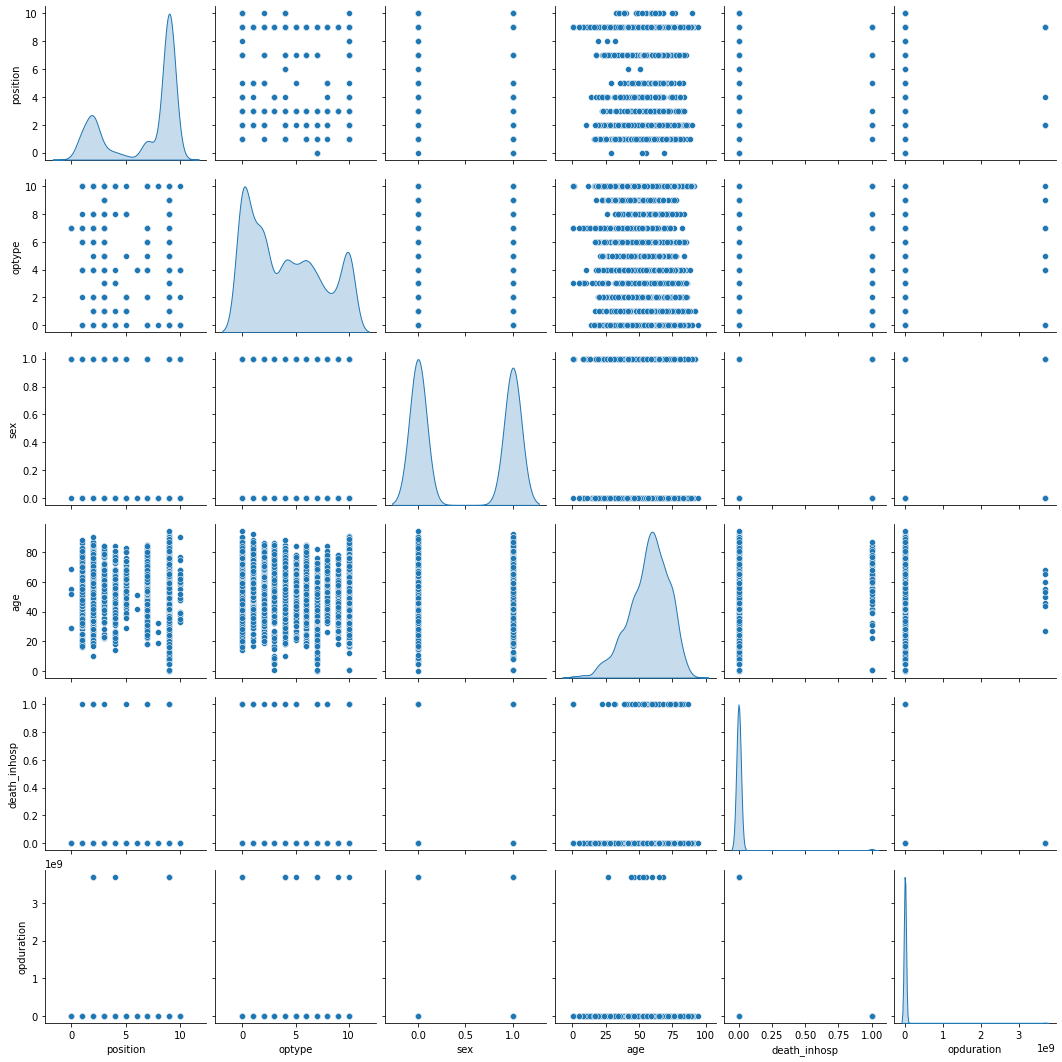

In [376]:
sns.pairplot(df_cases.sample(5000,random_state=0)[['position','optype','sex','age','death_inhosp','opduration']],diag_kind='kde')

In [295]:
df_cases['emop'].unique()

array([0, 1], dtype=int64)

## 트랙 칼럼 정보

In [296]:
df_trks['tname'].unique()

array(['BIS/BIS', 'BIS/EEG1_WAV', 'BIS/EEG2_WAV', 'BIS/EMG', 'BIS/SEF',
       'BIS/SQI', 'BIS/SR', 'BIS/TOTPOW', 'Primus/AWP', 'Primus/CO2',
       'Primus/COMPLIANCE', 'Primus/ETCO2', 'Primus/EXP_DES',
       'Primus/EXP_SEVO', 'Primus/FEN2O', 'Primus/FEO2', 'Primus/FIN2O',
       'Primus/FIO2', 'Primus/INCO2', 'Primus/INSP_DES',
       'Primus/INSP_SEVO', 'Primus/MAC', 'Primus/MAWP_MBAR', 'Primus/MV',
       'Primus/PAMB_MBAR', 'Primus/PEEP_MBAR', 'Primus/PIP_MBAR',
       'Primus/PPLAT_MBAR', 'Primus/RR_CO2', 'Primus/SET_AGE',
       'Primus/SET_FIO2', 'Primus/SET_FRESH_FLOW',
       'Primus/SET_INSP_PAUSE', 'Primus/SET_INSP_TM',
       'Primus/SET_INTER_PEEP', 'Primus/SET_PIP', 'Primus/SET_RR_IPPV',
       'Primus/SET_TV_L', 'Primus/TV', 'Primus/VENT_LEAK', 'SNUADC/ART',
       'SNUADC/ECG_II', 'SNUADC/ECG_V5', 'SNUADC/PLETH',
       'Solar8000/ART_DBP', 'Solar8000/ART_MBP', 'Solar8000/ART_SBP',
       'Solar8000/BT', 'Solar8000/ETCO2', 'Solar8000/FEO2',
       'Solar8000/FIO2', '

In [297]:
df_trks['tname'].nunique()

196

In [9]:
df_labs[:25]

,caseid,dt,name,result
0,1,594470,alb,2.9
1,1,399575,alb,3.2
2,1,12614,alb,3.4
3,1,137855,alb,3.6
4,1,399575,alt,12.0
5,1,137855,alt,16.0
6,1,594470,alt,17.0
7,1,12614,alt,20.0
8,1,12611,aptt,28.0
9,1,399575,ast,16.0


In [11]:
df_labs['name'].unique()

array(['alb', 'alt', 'aptt', 'ast', 'bun', 'cl', 'cr', 'crp', 'fib',
       'gfr', 'gluc', 'hb', 'hco3', 'hct', 'ica', 'k', 'lac', 'na',
       'pco2', 'ph', 'plt', 'po2', 'pt%', 'ptinr', 'ptsec', 'sao2',
       'tbil', 'tprot', 'wbc', 'be', 'p', 'esr', 'ccr', 'ammo'],
      dtype=object)

In [299]:
df_cases['sex'] = df_cases['sex'].map({'M':0,'F':1})

## 부서별, 크리스탈로이드 투여량, 사망환자

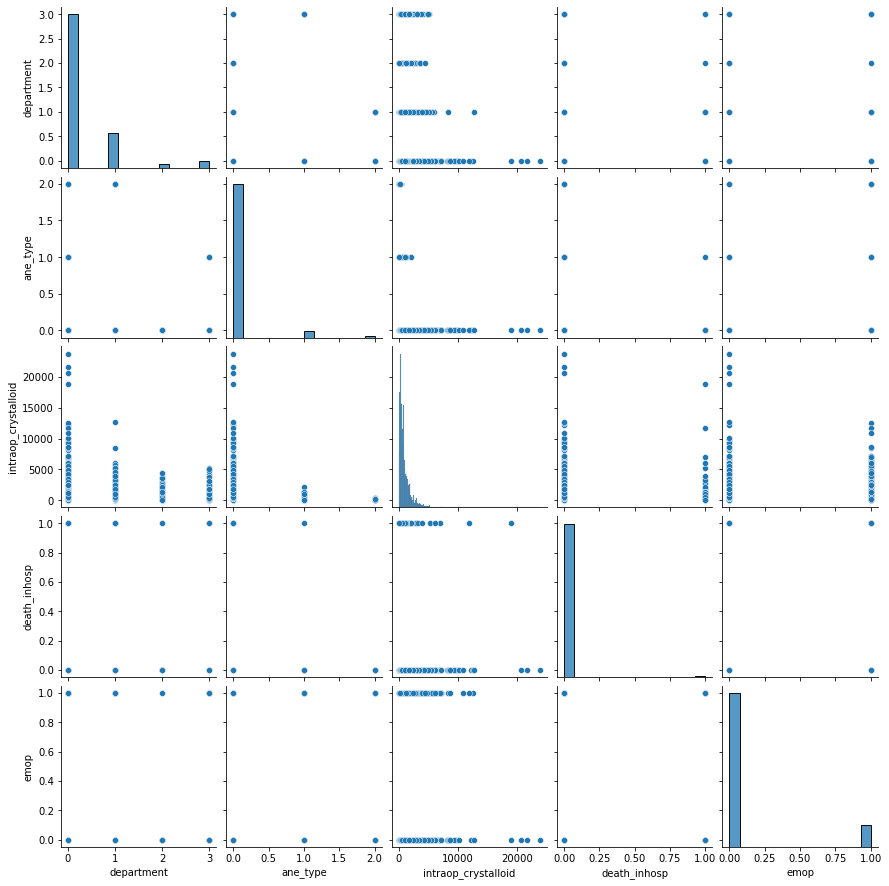

In [300]:
sns.pairplot(df_cases[['department','ane_type','intraop_crystalloid','death_inhosp','emop']])

## tublesize(기관내 삽관), lmasize(후두 마스크 삽관)와 사망환자
## 4. tublesize에 따른 연구

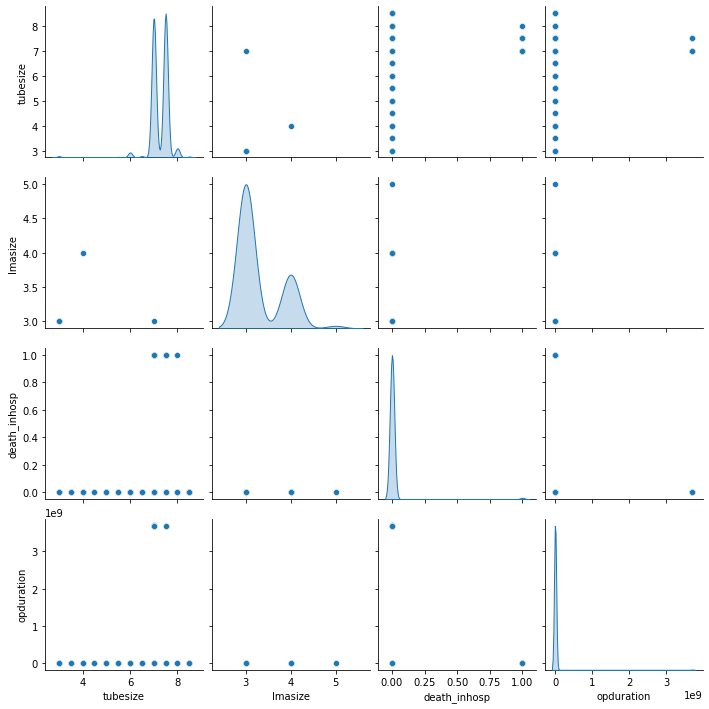

In [380]:
sns.pairplot(df_cases.sample(5000,random_state=0)[['cormack', 'airway', 'tubesize', 'dltubesize', 'lmasize','iv1', 'iv2', 'aline1', 'aline2', 'cline1', 'cline2','death_inhosp','opduration']],diag_kind='kde')

In [382]:
df_cases['iv1'].unique()

array(['Right forearm', 'Left forearm', 'Right hand', 'Left hand',
       'Left leg', 'Left foot', nan, 'Right etc', 'Right foot', 'Right ',
       'Left etc', 'Right leg'], dtype=object)

In [384]:
df_cases['aline1'].unique()

array(['Left radial', nan, 'Right radial', 'Right femoral',
       'Left dorsalis pedis', 'Right dorsalis pedis', 'Right etc',
       'Left etc', 'Left femoral', 'Right '], dtype=object)

## 성별,연령,키,몸무게와 수술시간

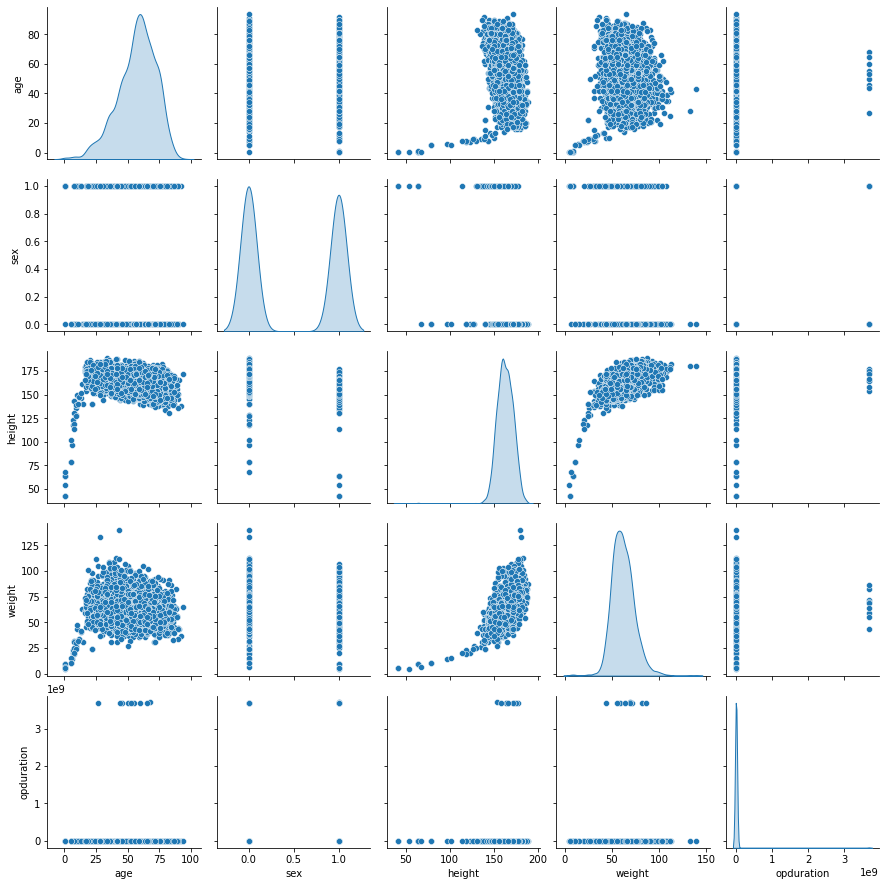

In [257]:
sns.pairplot(df_cases.sample(5000,random_state=0)[['age','sex','height','weight','opduration']],diag_kind='kde')

## 수술 중 약물 투여와 수술시간

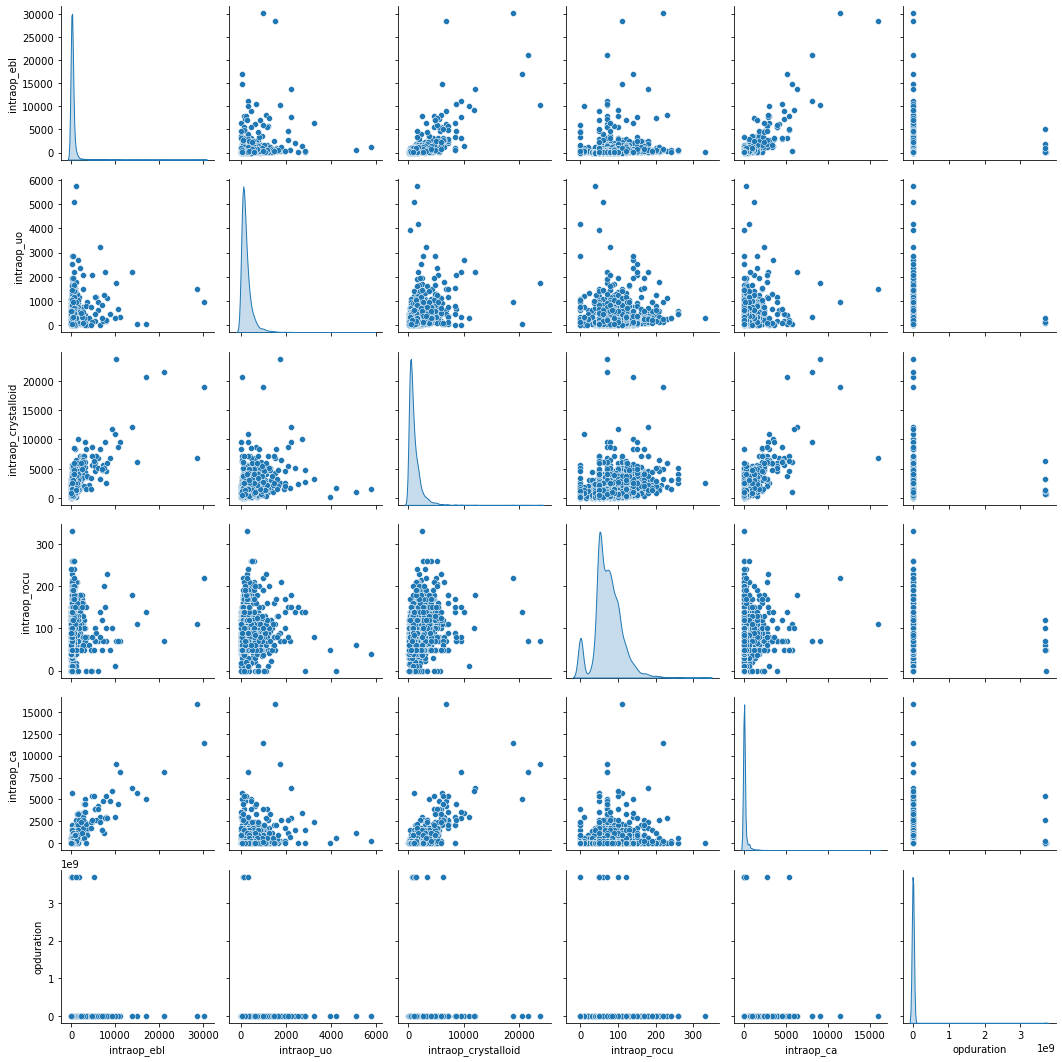

In [258]:
sns.pairplot(df_cases.sample(5000,random_state=0)[['intraop_ebl','intraop_uo','intraop_crystalloid','intraop_rocu', 'intraop_ca','opduration']],diag_kind='kde')

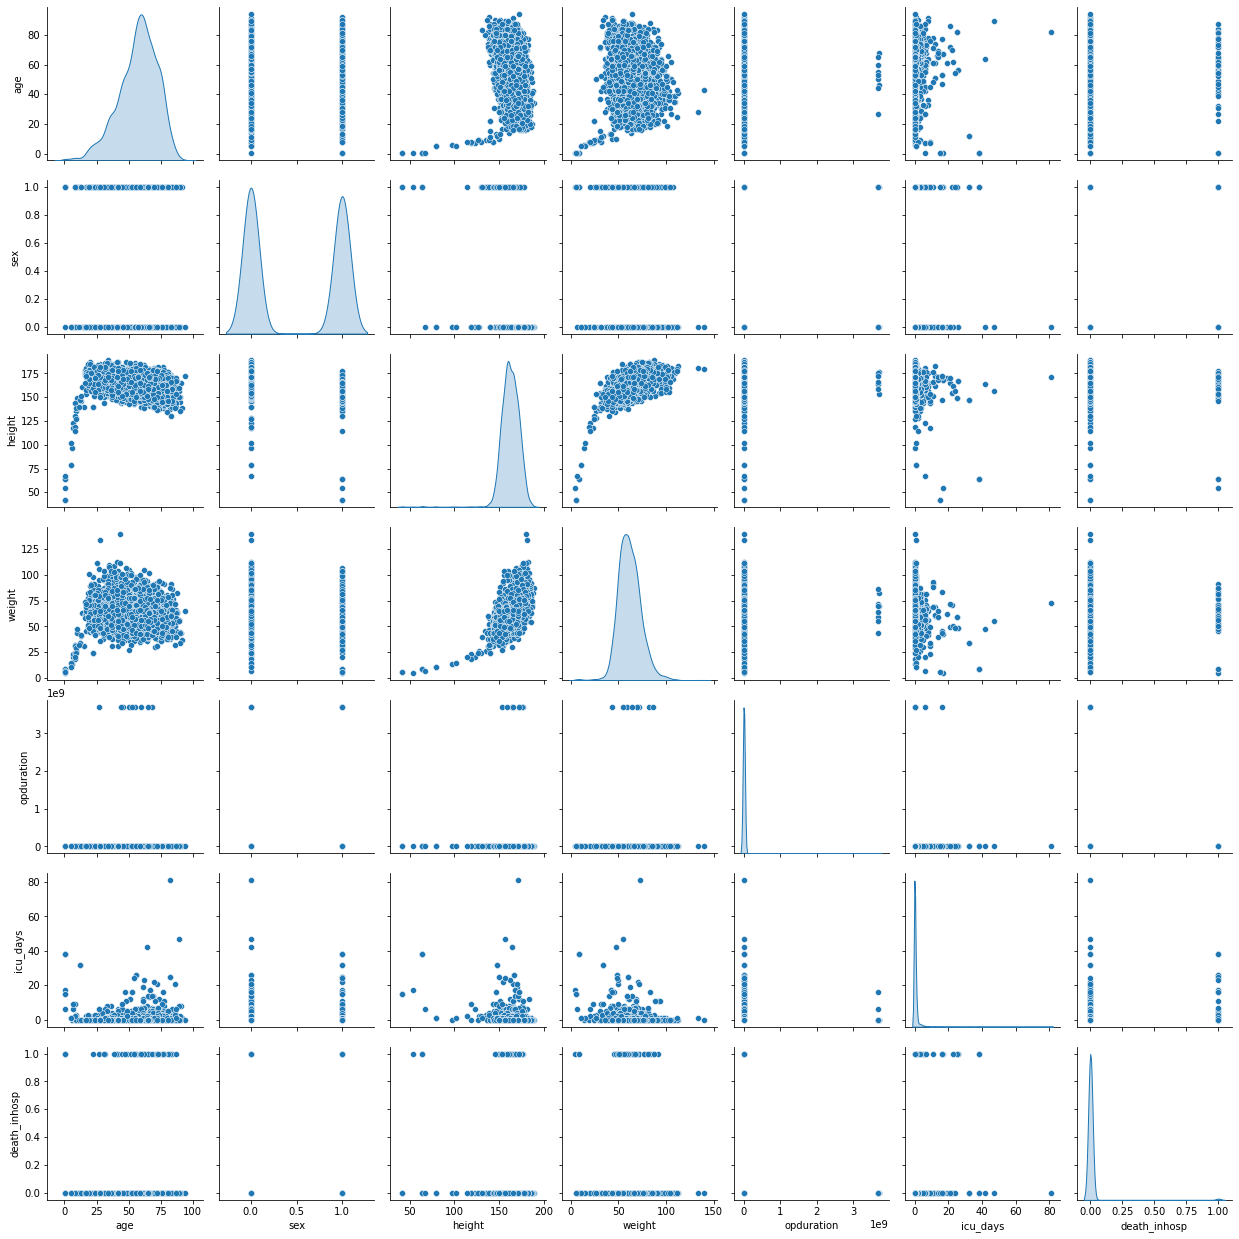

In [259]:
sns.pairplot(df_cases.sample(5000,random_state=0)[['age','sex','height','weight','opduration','icu_days', 'death_inhosp']],diag_kind='kde')

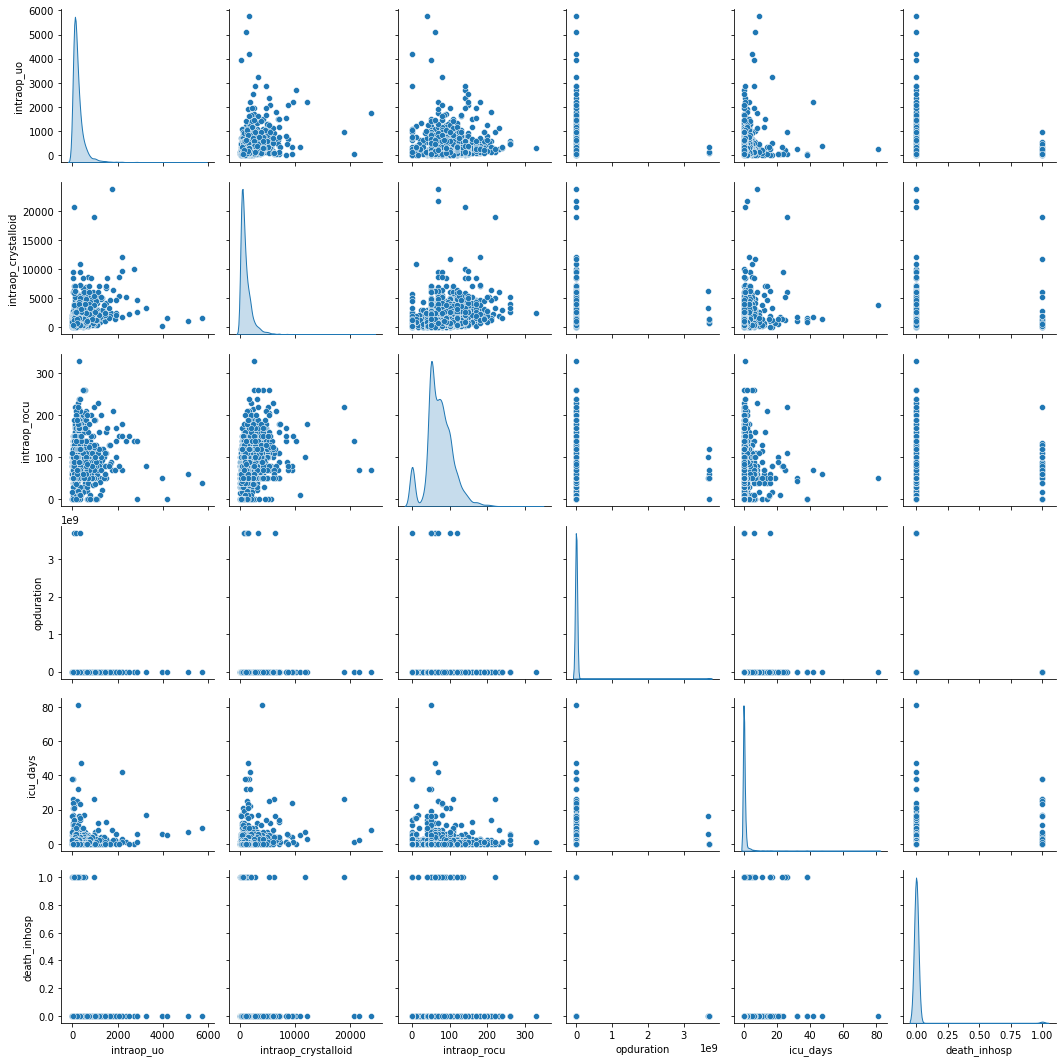

In [260]:
sns.pairplot(df_cases.sample(5000,random_state=0)[['intraop_uo','intraop_crystalloid','intraop_rocu','opduration','icu_days', 'death_inhosp']],diag_kind='kde')

### 승압제 사용 + 18세 이상 + 35kg 이상 + ART_MBP

In [140]:
caseids = list( (
    set(df_trks[df_trks['tname'] == 'Orchestra/NEPI_RATE']['caseid']) |
    set(df_trks[df_trks['tname'] == 'Orchestra/DOPA_RATE']['caseid']) |
    set(df_trks[df_trks['tname'] == 'Orchestra/EPI_RATE']['caseid']) |
    set(df_trks[df_trks['tname'] == 'Orchestra/DOBU_RATE']['caseid']) |
    set(df_trks[df_trks['tname'] == 'Orchestra/VASO_RATE']['caseid'])) &
    set(df_cases[df_cases['age'] >= 18]['caseid']) &
    set(df_cases[df_cases['weight'] >= 35]['caseid']) &
    set(df_trks[df_trks['tname'] == 'Solar8000/ART_MBP']['caseid'])
    #set(df_cases[df_cases['emop'] == 1]['caseid'])
)
#caseids = caseids[:100]
print('Total {} cases found'.format(len(caseids)))

Total 102 cases found


In [141]:
caseids

[1537,
 521,
 4621,
 4112,
 17,
 1558,
 536,
 2585,
 3101,
 4648,
 2605,
 2611,
 2612,
 3136,
 3142,
 5703,
 75,
 4683,
 3665,
 83,
 4179,
 3165,
 94,
 1124,
 617,
 5226,
 1132,
 1652,
 629,
 118,
 3703,
 2168,
 1668,
 6277,
 1671,
 1160,
 1673,
 6281,
 5771,
 1165,
 1172,
 4251,
 2205,
 5282,
 2738,
 703,
 3777,
 4289,
 1221,
 3270,
 3782,
 3273,
 1231,
 230,
 4328,
 3310,
 750,
 2823,
 783,
 1807,
 3857,
 1820,
 1311,
 1316,
 1835,
 4398,
 5954,
 2891,
 5983,
 5478,
 1896,
 1907,
 375,
 2432,
 4481,
 2945,
 387,
 1926,
 397,
 3470,
 5005,
 3476,
 409,
 3481,
 5018,
 931,
 3492,
 6063,
 2993,
 2489,
 1986,
 6084,
 452,
 464,
 4054,
 6102,
 984,
 2016,
 4072,
 490,
 3569,
 2034]

In [261]:
df_vaso = df_cases.loc[df_cases['caseid'].isin(caseids)].reset_index().drop(['index'],1)
df_vaso

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca,opduration
0,17,4343,0,20340,-180,20340,3540,19740,-380160,1002240,...,0,0.0,0,80,0,25,550,0,0,16200
1,75,427,0,25080,-780,24600,3900,24000,-136200,382200,...,0,0.0,0,200,0,0,1600,0,300,20100
2,83,1588,0,19380,-1260,19320,3120,18720,-223080,1072920,...,0,0.0,0,35,0,30,100,0,900,15600
3,94,4569,0,28920,-300,29100,-300,28500,-200700,2132100,...,100,0.0,0,115,0,30,250,0,450,28800
4,118,5581,0,29820,-1380,29520,3420,28620,-287880,662520,...,0,0.0,0,120,0,70,480,0,900,25200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,6063,2711,0,15660,-540,16860,-540,16260,-68340,882060,...,60,0.0,0,60,0,20,600,0,1200,16800
98,6084,4039,0,46740,-600,-3691435500,13500,46200,-1464300,2423700,...,0,5.0,0,0,0,0,450,0,1500,32700
99,6102,3203,0,10980,-540,10860,3060,10260,-374340,1008060,...,80,0.0,0,70,0,15,0,0,0,7200
100,6277,4088,0,11820,-1080,11820,4020,11220,-287880,489720,...,0,0.0,0,70,0,50,550,0,0,7200


## 수술 시간

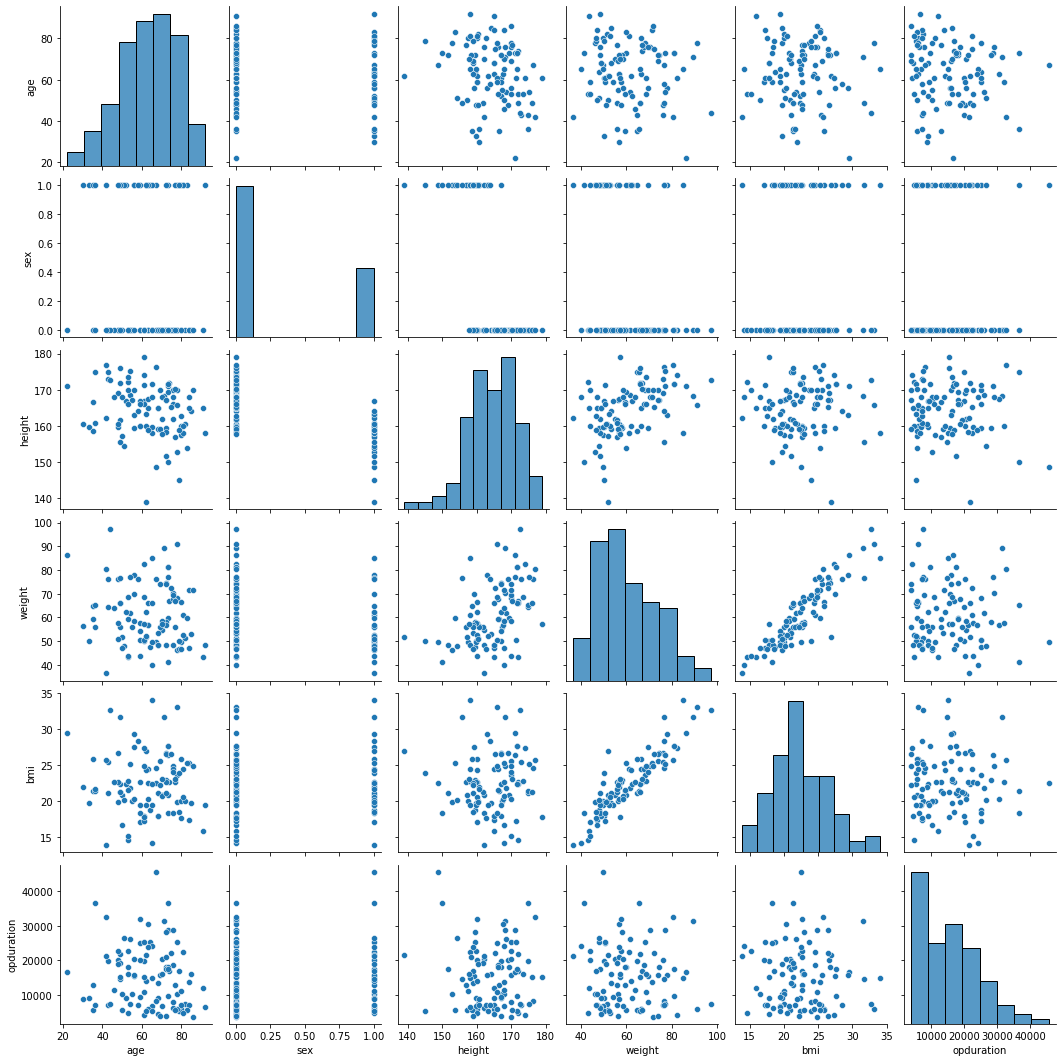

In [263]:
sns.pairplot(df_vaso[['age','sex', 'height', 'weight', 'bmi','opduration']])

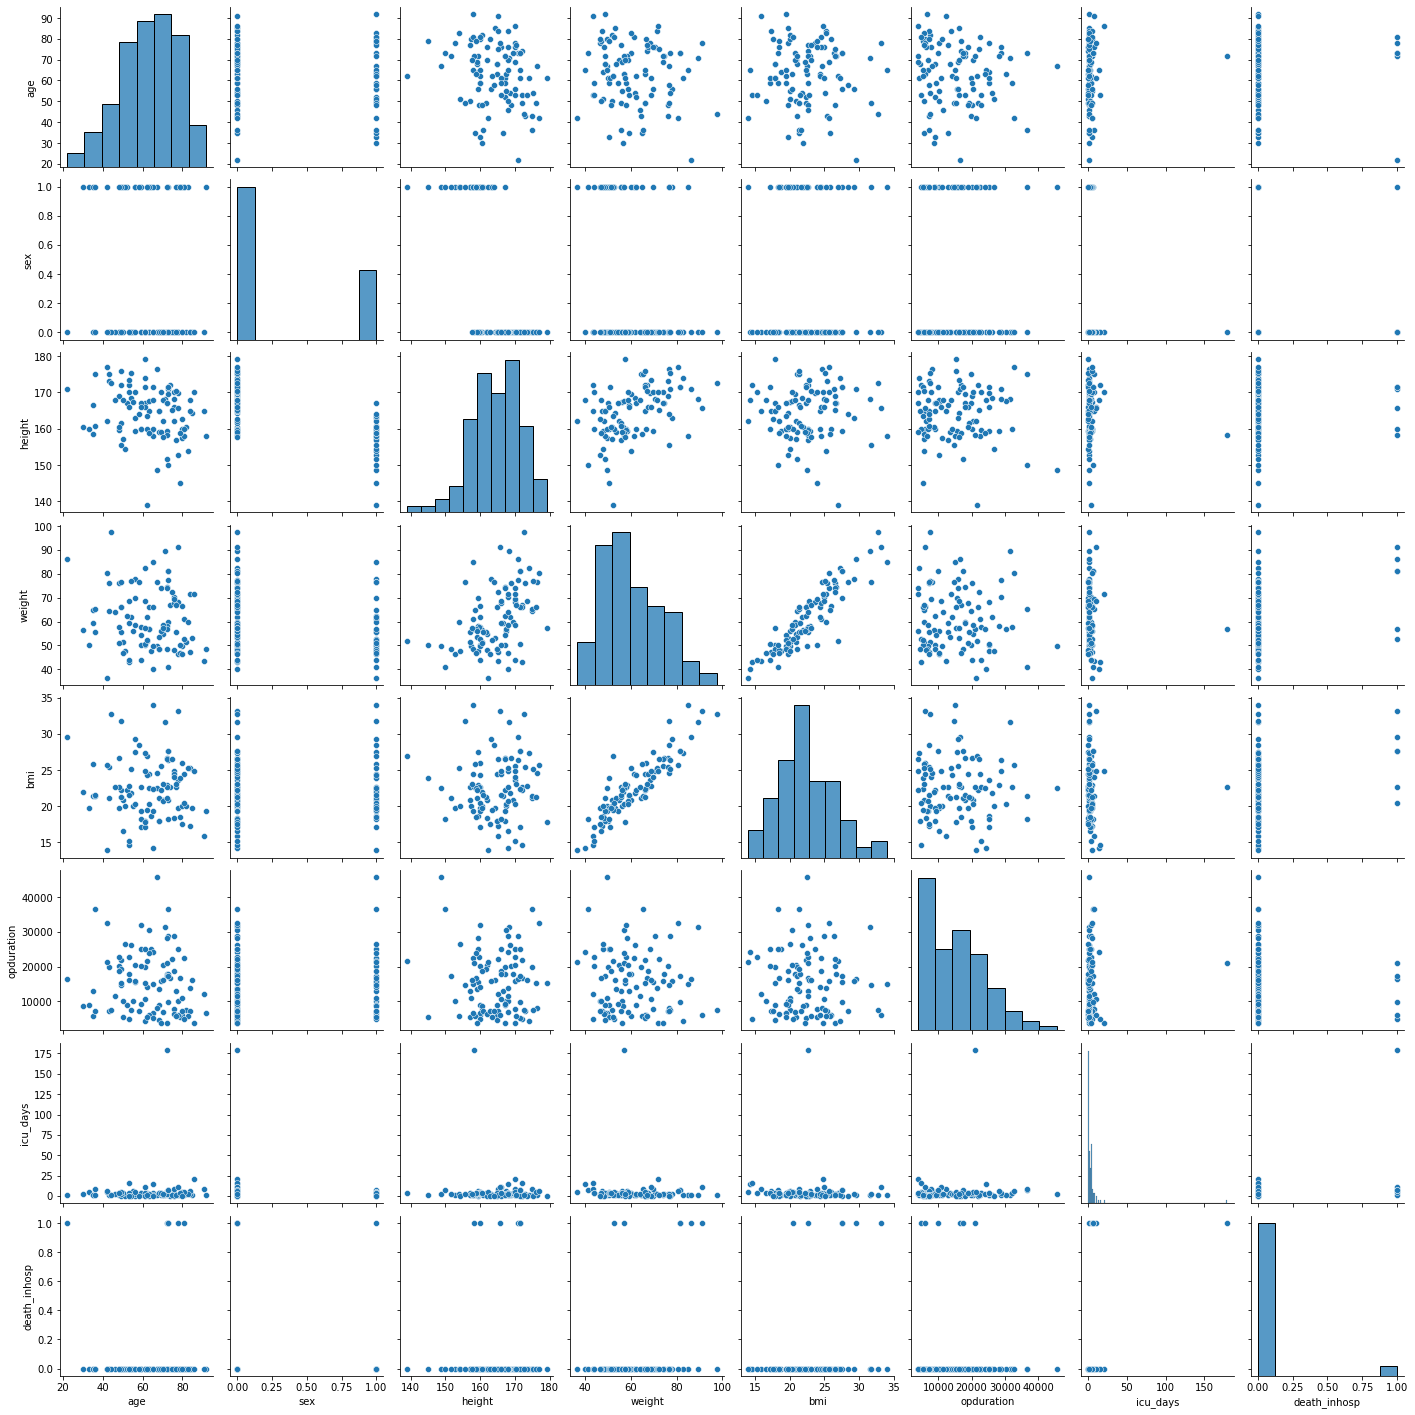

In [264]:
sns.pairplot(df_vaso[['age','sex', 'height', 'weight', 'bmi','opduration','icu_days', 'death_inhosp']])

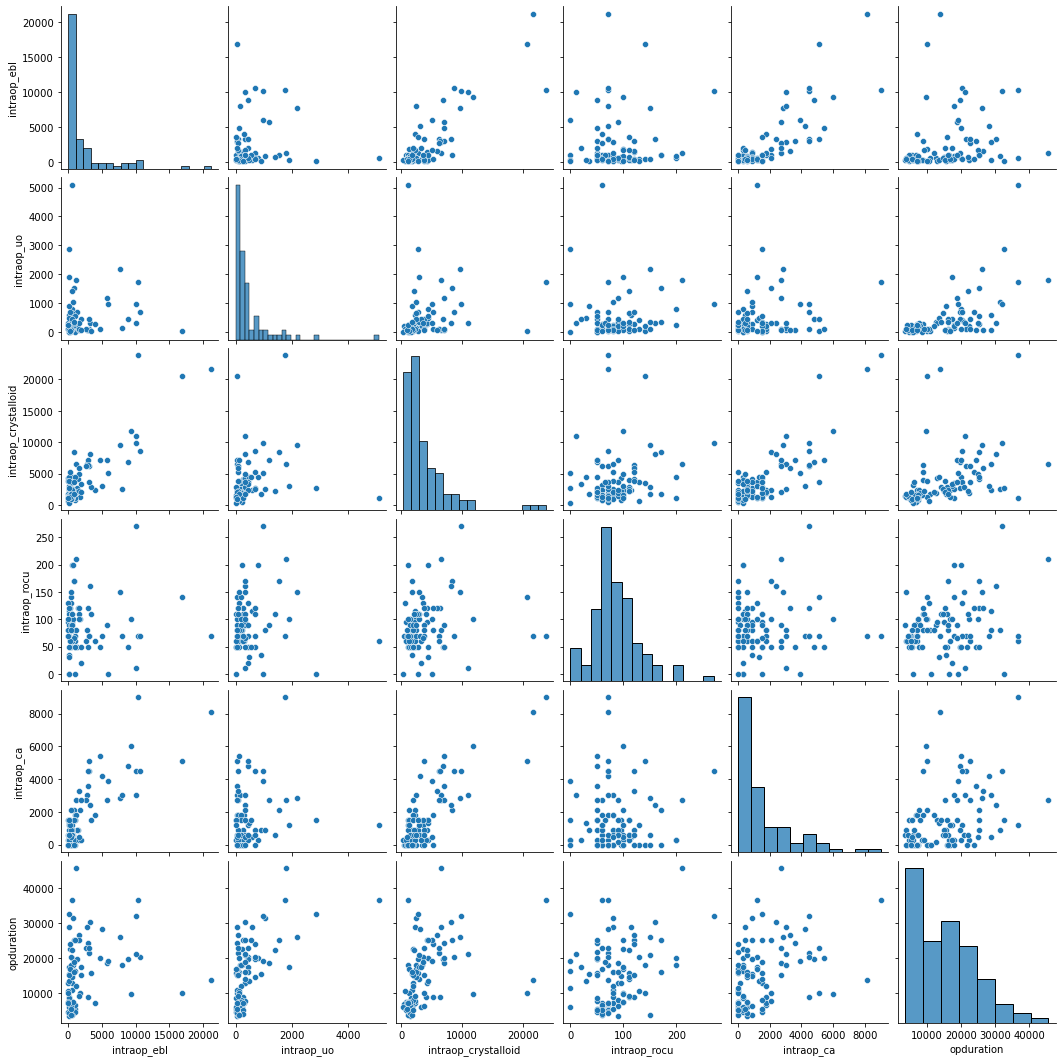

In [265]:
sns.pairplot(df_vaso[['intraop_ebl','intraop_uo','intraop_crystalloid','intraop_rocu', 'intraop_ca','opduration']])

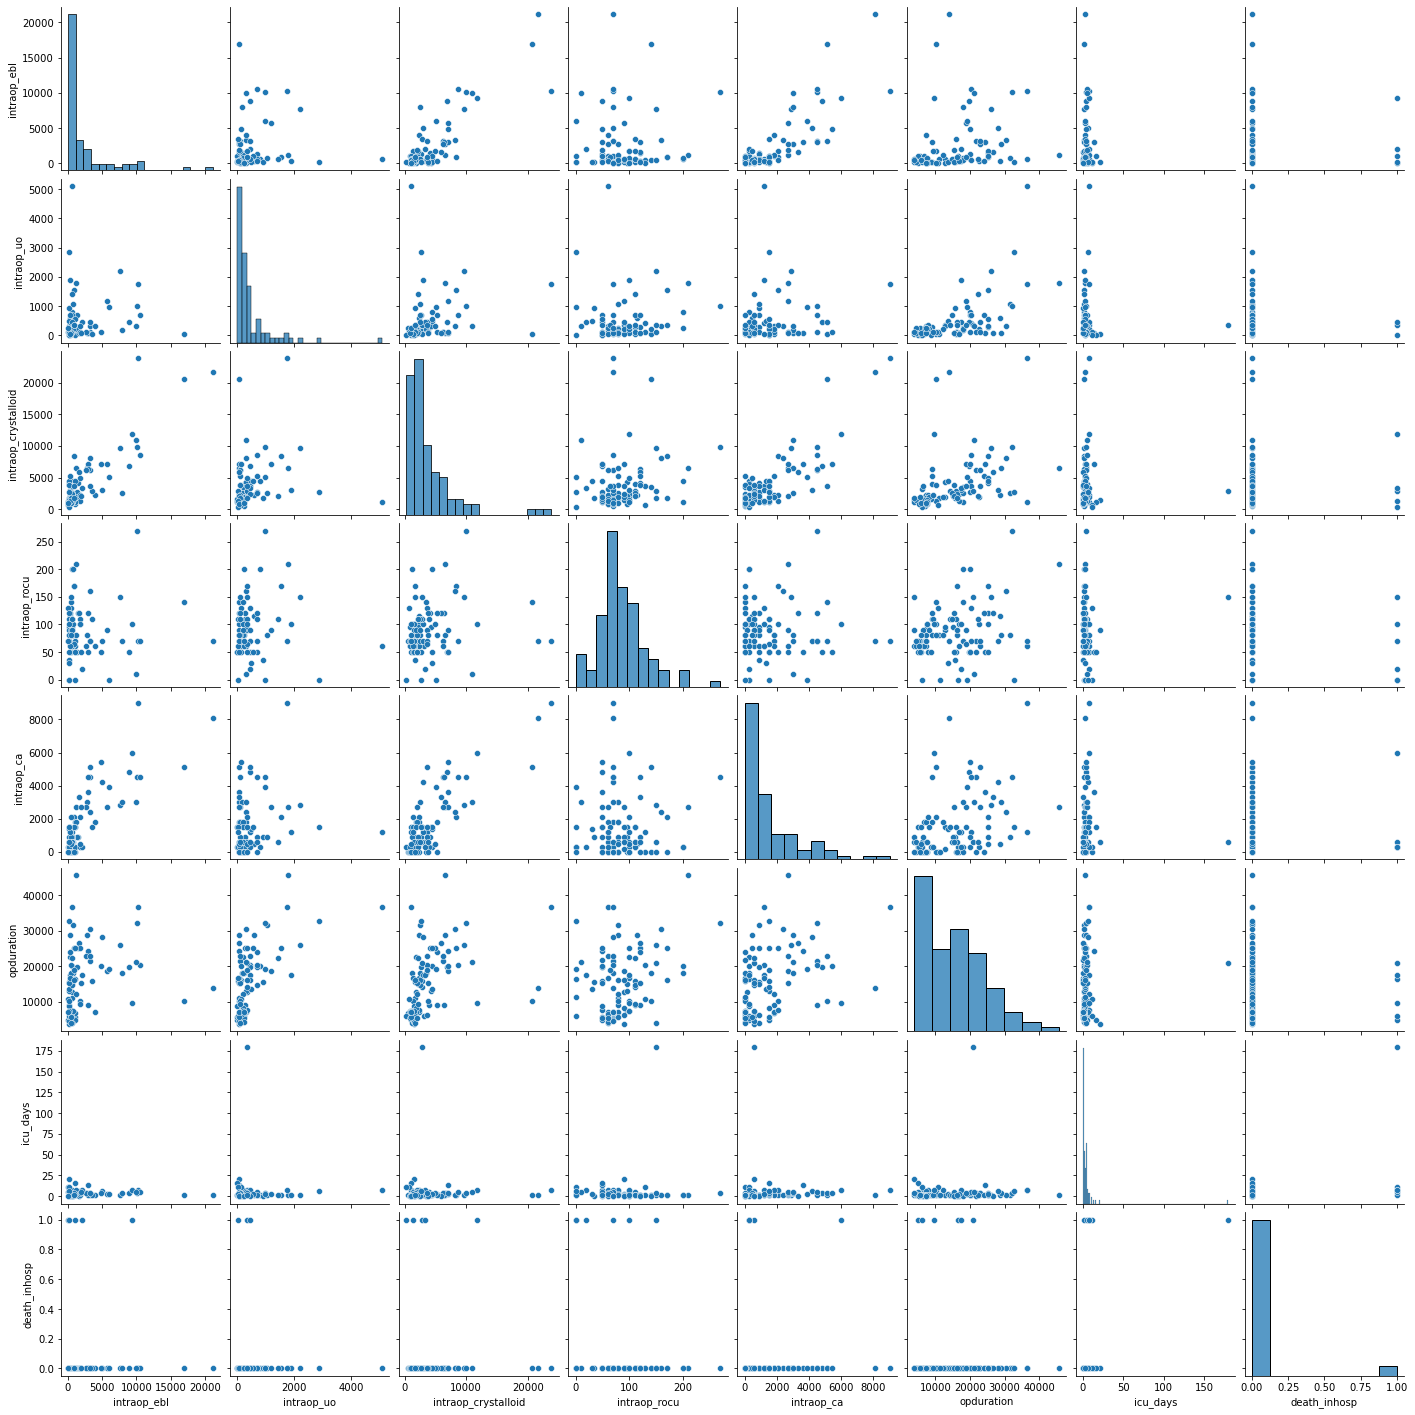

In [266]:
sns.pairplot(df_vaso[['intraop_ebl','intraop_uo','intraop_crystalloid','intraop_rocu', 'intraop_ca','opduration','icu_days', 'death_inhosp']])

In [168]:
caseids

[1537,
 521,
 4621,
 4112,
 17,
 1558,
 536,
 2585,
 3101,
 4648,
 2605,
 2611,
 2612,
 3136,
 3142,
 5703,
 75,
 4683,
 3665,
 83,
 4179,
 3165,
 94,
 1124,
 617,
 5226,
 1132,
 1652,
 629,
 118,
 3703,
 2168,
 1668,
 6277,
 1671,
 1160,
 1673,
 6281,
 5771,
 1165,
 1172,
 4251,
 2205,
 5282,
 2738,
 703,
 3777,
 4289,
 1221,
 3270,
 3782,
 3273,
 1231,
 230,
 4328,
 3310,
 750,
 2823,
 783,
 1807,
 3857,
 1820,
 1311,
 1316,
 1835,
 4398,
 5954,
 2891,
 5983,
 5478,
 1896,
 1907,
 375,
 2432,
 4481,
 2945,
 387,
 1926,
 397,
 3470,
 5005,
 3476,
 409,
 3481,
 5018,
 931,
 3492,
 6063,
 2993,
 2489,
 1986,
 6084,
 452,
 464,
 4054,
 6102,
 984,
 2016,
 4072,
 490,
 3569,
 2034]

In [267]:
na_cnt = 0 #SBP가 없는 환자
hypertension_list = []
na_list = []
for i in caseids:
    vals = vitaldb.load_case(caseid=i, tnames=['Solar8000/NIBP_SBP'], interval=150)
    if(len(vals)>0):
        if(np.nanmin(vals[:,0])<90):
            hypertension_list.append(i)
    else:
        na_list.append(i) 

In [268]:
hypertension_list

[1537,
 17,
 3101,
 4648,
 2611,
 5703,
 83,
 3165,
 94,
 1124,
 617,
 5226,
 1652,
 118,
 3703,
 2168,
 6277,
 1671,
 1160,
 6281,
 5771,
 1172,
 2205,
 2738,
 3270,
 3273,
 1231,
 230,
 4328,
 3310,
 750,
 1820,
 1311,
 1316,
 1835,
 4398,
 5954,
 5983,
 4481,
 2945,
 387,
 1926,
 397,
 5005,
 3476,
 5018,
 2993,
 4054,
 6102,
 2016,
 4072,
 490,
 3569]

In [270]:
print('hypotension : ',len(hypertension_list))


hypotension :  53


In [271]:
print('SBP 데이터가 없는 환자 : ',len(na_list))

SBP 데이터가 없는 환자 :  33


In [206]:
plt.figure(figsize=(20, 5))
plt.plot(vals[:, 0], color='r')
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 1440x360 with 0 Axes>

In [272]:
df_hypo = df_vaso.loc[df_vaso['caseid'].isin(hypertension_list)].reset_index().drop(['index'],1)
df_hypo

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca,opduration
0,17,4343,0,20340,-180,20340,3540,19740,-380160,1002240,...,0,0.0,0,80,0,25,550,0,0,16200
1,83,1588,0,19380,-1260,19320,3120,18720,-223080,1072920,...,0,0.0,0,35,0,30,100,0,900,15600
2,94,4569,0,28920,-300,29100,-300,28500,-200700,2132100,...,100,0.0,0,115,0,30,250,0,450,28800
3,118,5581,0,29820,-1380,29520,3420,28620,-287880,662520,...,0,0.0,0,120,0,70,480,0,900,25200
4,230,3021,0,26040,-960,26040,-960,25140,-201660,1267140,...,150,0.0,0,150,0,20,680,20,2850,26100
5,387,6034,0,8280,-240,8220,2220,8220,-82380,695220,...,0,0.0,0,60,0,0,1700,0,600,6000
6,397,3962,0,24240,-420,24060,3660,23460,-2288940,1167060,...,0,0.0,0,50,0,70,480,140,4800,19800
7,490,323,0,22740,-600,22200,-600,21900,-292800,1089600,...,0,0.0,0,100,0,30,0,0,300,22500
8,617,3572,0,10980,-240,11760,1260,11460,-856440,1389960,...,100,0.0,100,100,0,0,200,70,2100,10200
9,750,4426,0,46500,240,46500,240,45900,-218100,1941900,...,100,0.0,0,210,0,30,1050,0,2700,45660


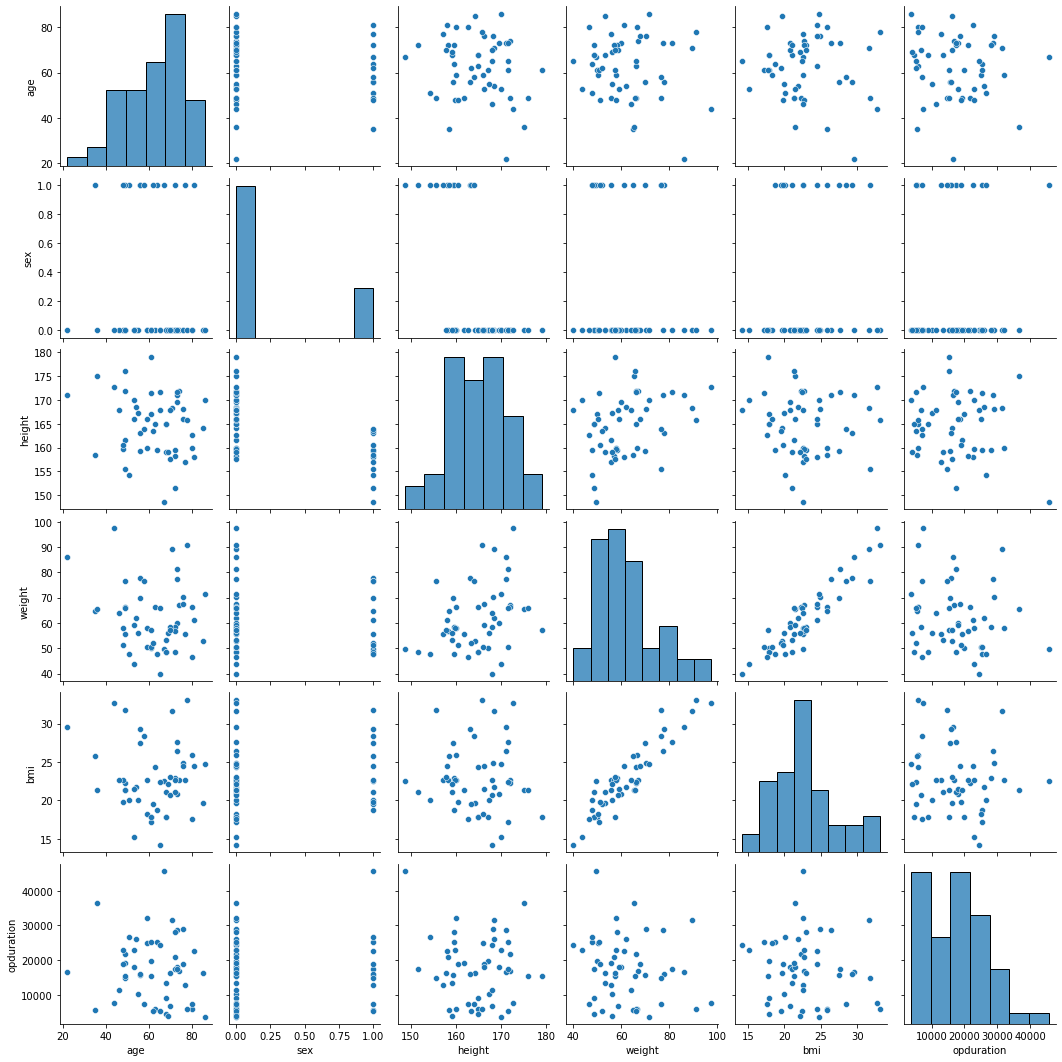

In [273]:
sns.pairplot(df_hypo[['age','sex', 'height', 'weight', 'bmi','opduration']])

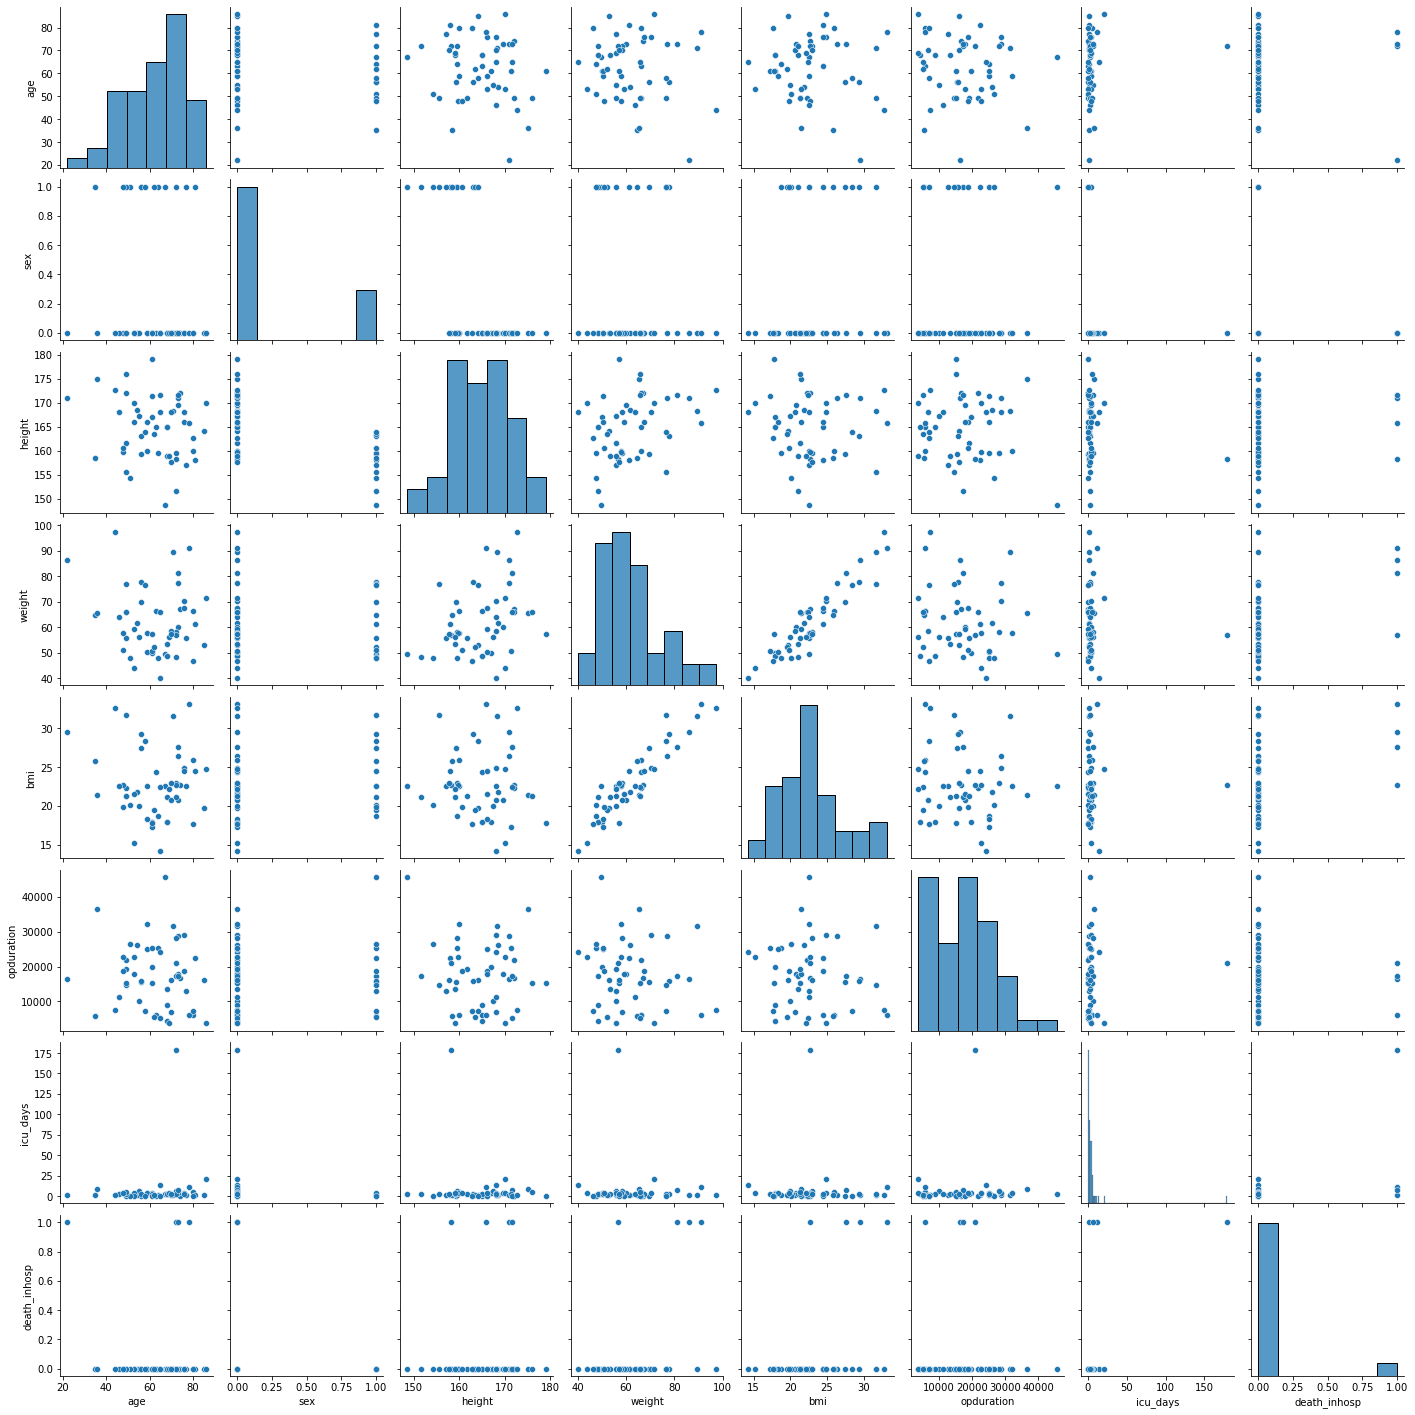

In [276]:
sns.pairplot(df_hypo[['age','sex', 'height', 'weight', 'bmi','opduration','icu_days', 'death_inhosp']])

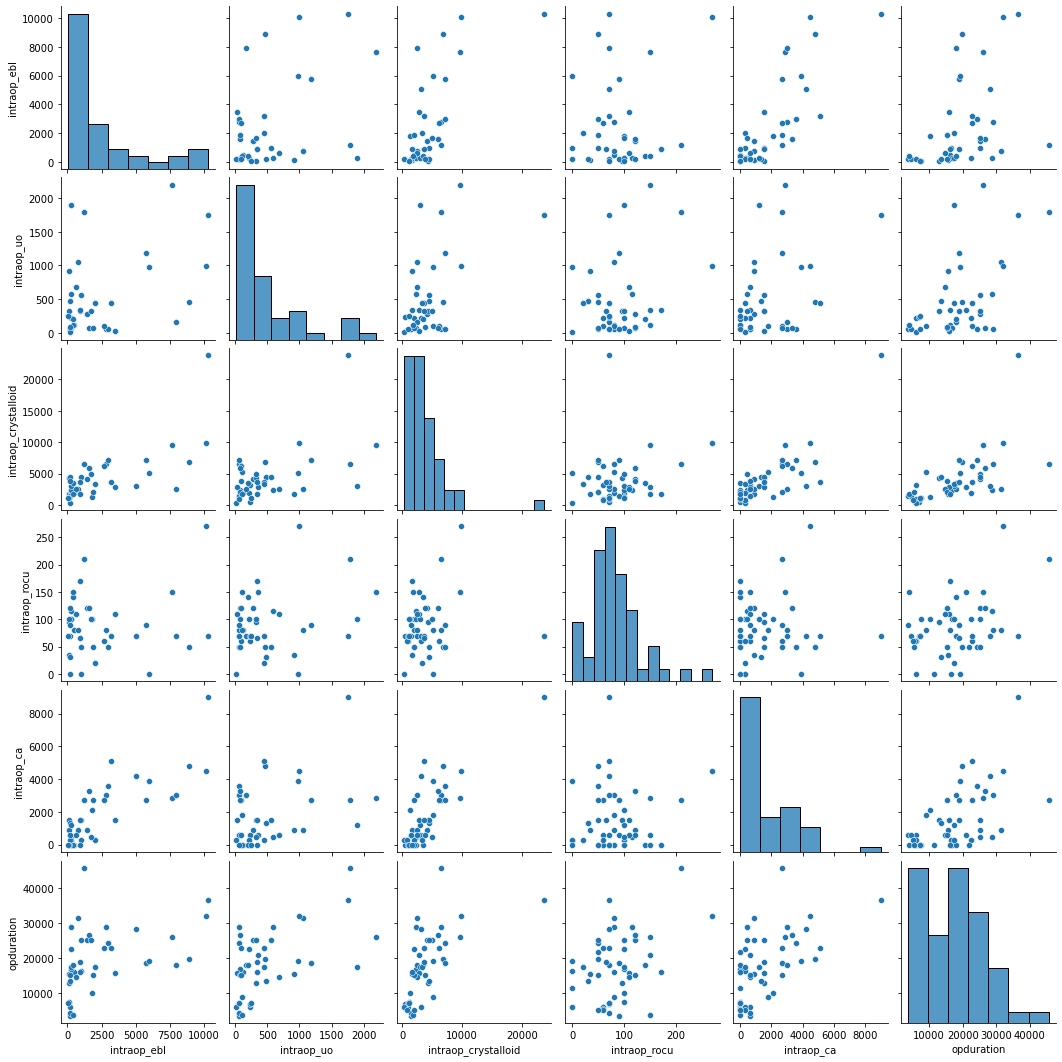

In [274]:
sns.pairplot(df_hypo[['intraop_ebl','intraop_uo','intraop_crystalloid','intraop_rocu', 'intraop_ca','opduration']])

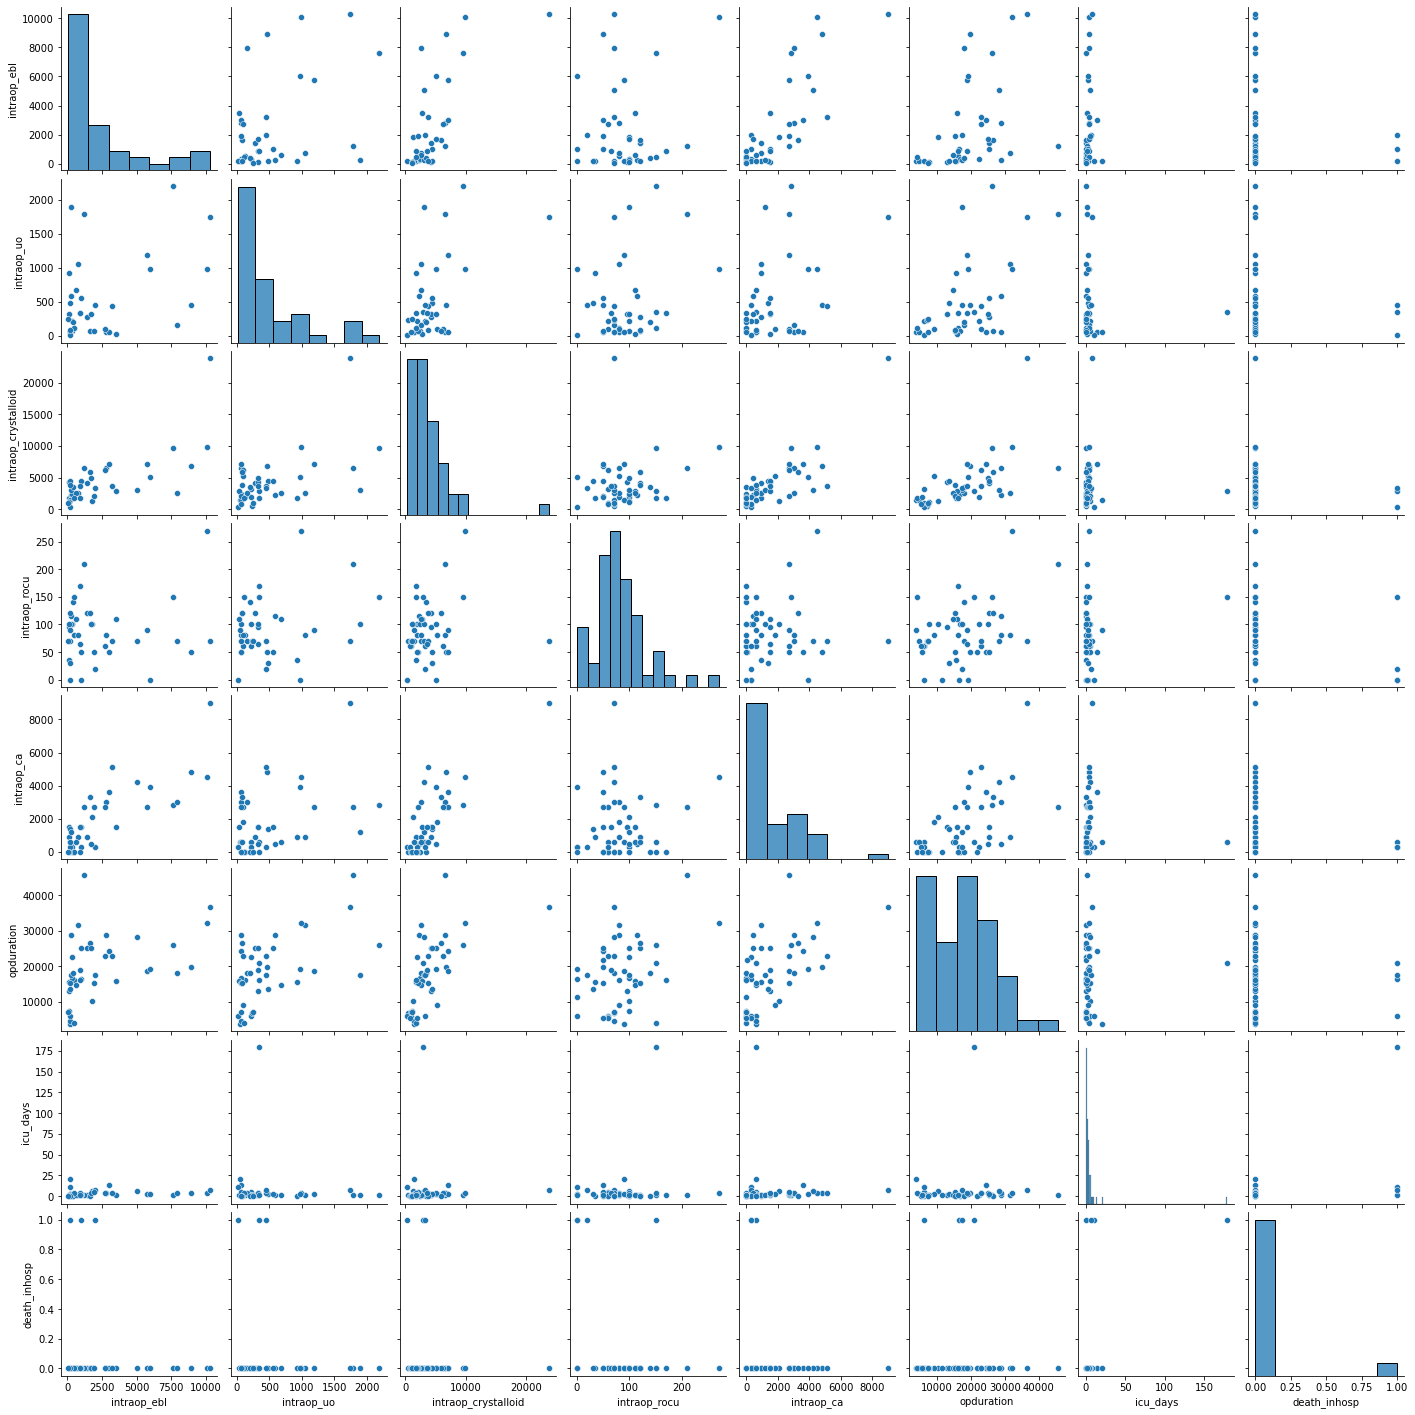

In [275]:
sns.pairplot(df_hypo[['intraop_ebl','intraop_uo','intraop_crystalloid','intraop_rocu', 'intraop_ca','opduration','icu_days', 'death_inhosp']])